In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.layers import *
from keras.models import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("History Closing Price.csv")
df.isnull().sum()
df = df.dropna(how="any")
df

,Stock,Company,Floor,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2022-12-02,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-12,2022-12-13,2022-12-14,2022-12-15
0,AAA,CTCP Nhựa & Môi Trường Xanh An Phát,HOSE,12.75,12.70,12.30,12.40,12.00,12.05,12.10,...,7.88,7.99,7.60,7.21,7.36,7.41,7.59,7.50,7.57,7.57
1,AAM,CTCP Thủy Sản MeKong,HOSE,11.95,12.50,12.50,12.50,12.50,12.50,13.00,...,12.05,12.40,12.30,12.20,12.15,11.70,11.65,12.20,12.00,12.00
2,ACC,CTCP Bê Tông Becamex,HOSE,18.90,19.00,19.00,19.00,19.00,18.90,19.40,...,12.00,11.20,10.85,10.85,11.00,10.95,11.10,11.00,11.20,11.20
3,ACL,CTCP XNK Thủy sản Cửu Long An Giang,HOSE,23.20,23.00,22.75,22.60,22.40,22.30,22.60,...,11.80,11.95,12.75,11.90,11.55,11.40,12.15,12.15,12.00,12.00
4,AGM,CTCP Xuất Nhập Khẩu An Giang,HOSE,10.15,10.30,10.25,10.25,10.20,10.30,10.30,...,11.90,11.40,10.90,10.15,10.35,10.70,10.45,10.45,10.35,10.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,VIC,Tập đoàn VINGROUP - CTCP,HOSE,115.00,115.30,114.50,114.70,114.30,114.70,114.80,...,68.80,68.10,66.60,71.20,69.90,67.80,63.10,61.60,60.80,60.80
96,VNM,CTCP Sữa Việt Nam,HOSE,117.90,118.30,117.40,118.50,118.80,118.60,118.90,...,84.00,85.00,82.50,82.50,81.00,80.00,78.50,78.00,77.50,77.50
97,VSC,CTCP Container Việt Nam,HOSE,27.40,28.00,27.50,27.20,26.60,27.00,27.00,...,32.05,31.70,32.80,31.80,31.50,32.00,31.15,31.25,31.25,31.25
98,VSH,CTCP Thủy Điện Vĩnh Sơn - Sông Hinh,HOSE,21.60,22.20,22.30,22.20,22.40,21.75,21.75,...,31.30,32.00,31.30,31.00,32.00,32.00,31.50,31.50,31.80,31.80


<h1>Extract Data</h1>

In [3]:
stock = str(df["Stock"][90])
print(stock)
company = str(df["Company"][90])
print(company)

TCT
CTCP Cáp Treo Núi Bà Tây Ninh


In [4]:
date = list(df.columns.values)
date.pop(0)
date.pop(0)
date.pop(0)
print(date)

['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020

In [5]:
df = df[df["Stock"] == stock]
df

,Stock,Company,Floor,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2022-12-02,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-12,2022-12-13,2022-12-14,2022-12-15
90,TCT,CTCP Cáp Treo Núi Bà Tây Ninh,HOSE,43.4,44.5,42.5,44.2,44.2,42.5,42.5,...,31.8,32.7,33.8,34.8,36.7,35.9,33.5,34.9,35.9,35.9


In [6]:
prices = (df.values).tolist()[0]
prices.pop(0)
prices.pop(0)
prices.pop(0)
print(prices)

[43.4, 44.5, 42.5, 44.2, 44.2, 42.5, 42.5, 42.5, 43.0, 43.0, 43.0, 45.0, 44.5, 44.0, 46.0, 44.0, 43.8, 42.2, 42.2, 42.3, 42.0, 42.0, 41.0, 41.5, 42.9, 40.8, 41.9, 41.5, 41.5, 41.0, 41.9, 42.4, 40.0, 40.0, 38.55, 38.0, 38.0, 38.0, 37.5, 37.7, 38.0, 38.0, 37.5, 35.0, 35.0, 33.0, 33.9, 32.1, 32.0, 30.6, 31.0, 31.0, 29.6, 29.6, 29.6, 30.0, 29.6, 29.6, 29.65, 29.65, 29.75, 31.7, 32.0, 32.0, 32.0, 32.2, 33.0, 33.9, 35.0, 34.8, 35.0, 35.0, 34.5, 34.5, 34.5, 35.0, 34.2, 34.9, 35.0, 34.2, 34.5, 35.0, 34.8, 34.9, 34.9, 34.9, 34.7, 34.3, 34.2, 34.2, 34.0, 33.5, 33.3, 32.8, 32.0, 31.5, 32.9, 32.0, 31.6, 32.0, 32.9, 32.8, 32.75, 32.5, 32.95, 32.0, 32.2, 31.8, 31.6, 31.6, 31.5, 31.0, 30.9, 30.65, 30.7, 30.8, 29.9, 29.6, 28.8, 27.2, 27.1, 26.4, 25.9, 26.0, 25.7, 27.45, 29.2, 28.7, 27.5, 27.35, 26.8, 26.9, 28.2, 27.8, 27.0, 27.0, 26.95, 26.9, 26.7, 24.85, 24.85, 24.5, 23.6, 23.3, 23.3, 23.2, 24.2, 24.8, 24.6, 24.7, 24.6, 24.7, 24.8, 24.8, 24.05, 24.5, 25.05, 25.1, 25.0, 24.9, 25.9, 25.9, 25.6, 25.3, 2

In [7]:
print(len(date))
print(len(prices))

740
740


In [8]:
df_stock = {'Date': date, 'ClosingPrice': prices}
df_stock  = pd.DataFrame(df_stock )
df_stock.set_index('Date', inplace=True)
df_stock 

,ClosingPrice
Date,
2020-01-02,43.4
2020-01-03,44.5
2020-01-06,42.5
2020-01-07,44.2
2020-01-08,44.2
...,...
2022-12-09,35.9
2022-12-12,33.5
2022-12-13,34.9


<h1>Data Visualization</h1>

<AxesSubplot:xlabel='Date'>

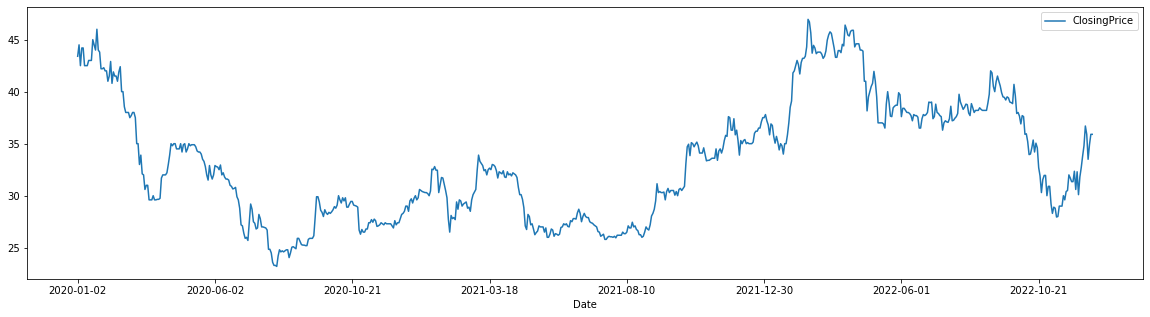

In [9]:
df_stock[['ClosingPrice']].plot(figsize = (20, 5))

<h1>Train and Test dataset</h1>

In [10]:
index = df_stock.index.get_loc('2021-12-31') + 1
stop_index = df_stock.index.get_loc('2022-05-04')
df_train = df_stock.iloc[:index,:]
df_test = df_stock.iloc[index:stop_index,:]

In [11]:
df_train

,ClosingPrice
Date,
2020-01-02,43.4
2020-01-03,44.5
2020-01-06,42.5
2020-01-07,44.2
2020-01-08,44.2
...,...
2021-12-27,36.5
2021-12-28,37.1
2021-12-29,37.5


In [12]:
df_test

,ClosingPrice
Date,
2022-01-04,37.20
2022-01-05,36.80
2022-01-06,35.85
2022-01-07,36.90
2022-01-10,36.75
...,...
2022-04-25,38.15
2022-04-26,39.50
2022-04-27,40.00


In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scalered_data = scaler.fit_transform(df_train["ClosingPrice"].values.reshape(-1,1))
print(len(scalered_data))
scalered_data

502


array([[0.88596491],
       [0.93421053],
       [0.84649123],
       [0.92105263],
       [0.92105263],
       [0.84649123],
       [0.84649123],
       [0.84649123],
       [0.86842105],
       [0.86842105],
       [0.86842105],
       [0.95614035],
       [0.93421053],
       [0.9122807 ],
       [1.        ],
       [0.9122807 ],
       [0.90350877],
       [0.83333333],
       [0.83333333],
       [0.8377193 ],
       [0.8245614 ],
       [0.8245614 ],
       [0.78070175],
       [0.80263158],
       [0.86403509],
       [0.77192982],
       [0.82017544],
       [0.80263158],
       [0.80263158],
       [0.78070175],
       [0.82017544],
       [0.84210526],
       [0.73684211],
       [0.73684211],
       [0.67324561],
       [0.64912281],
       [0.64912281],
       [0.64912281],
       [0.62719298],
       [0.63596491],
       [0.64912281],
       [0.64912281],
       [0.62719298],
       [0.51754386],
       [0.51754386],
       [0.42982456],
       [0.46929825],
       [0.390

In [14]:
x_train = []
y_train = []
for i in range(30, len(scalered_data)):
    x_train.append(scalered_data[i-30:i, 0])
    y_train.append(scalered_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)
print(y_train.shape)

(472, 30, 1)
(472,)


In [15]:
x_train

array([[[0.88596491],
        [0.93421053],
        [0.84649123],
        ...,
        [0.80263158],
        [0.80263158],
        [0.78070175]],

       [[0.93421053],
        [0.84649123],
        [0.92105263],
        ...,
        [0.80263158],
        [0.78070175],
        [0.82017544]],

       [[0.84649123],
        [0.92105263],
        [0.92105263],
        ...,
        [0.78070175],
        [0.82017544],
        [0.84210526]],

       ...,

       [[0.47807018],
        [0.49780702],
        [0.53070175],
        ...,
        [0.58333333],
        [0.58333333],
        [0.60964912]],

       [[0.49780702],
        [0.53070175],
        [0.55263158],
        ...,
        [0.58333333],
        [0.60964912],
        [0.62719298]],

       [[0.53070175],
        [0.55263158],
        [0.54824561],
        ...,
        [0.60964912],
        [0.62719298],
        [0.62719298]]])

In [16]:
y_train

array([0.82017544, 0.84210526, 0.73684211, 0.73684211, 0.67324561,
       0.64912281, 0.64912281, 0.64912281, 0.62719298, 0.63596491,
       0.64912281, 0.64912281, 0.62719298, 0.51754386, 0.51754386,
       0.42982456, 0.46929825, 0.39035088, 0.38596491, 0.3245614 ,
       0.34210526, 0.34210526, 0.28070175, 0.28070175, 0.28070175,
       0.29824561, 0.28070175, 0.28070175, 0.28289474, 0.28289474,
       0.2872807 , 0.37280702, 0.38596491, 0.38596491, 0.38596491,
       0.39473684, 0.42982456, 0.46929825, 0.51754386, 0.50877193,
       0.51754386, 0.51754386, 0.49561404, 0.49561404, 0.49561404,
       0.51754386, 0.48245614, 0.51315789, 0.51754386, 0.48245614,
       0.49561404, 0.51754386, 0.50877193, 0.51315789, 0.51315789,
       0.51315789, 0.50438596, 0.48684211, 0.48245614, 0.48245614,
       0.47368421, 0.45175439, 0.44298246, 0.42105263, 0.38596491,
       0.36403509, 0.4254386 , 0.38596491, 0.36842105, 0.38596491,
       0.4254386 , 0.42105263, 0.41885965, 0.40789474, 0.42763

<h1>Train Model</h1>

In [17]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()
model.fit(x_train, y_train, epochs = 150, batch_size = 32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [18]:
actual_prices = df_test["ClosingPrice"].values

inputs = df_stock.iloc[index - 30 :stop_index,:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
#Prediction on test data
x_test = []
for x in range(30, len(inputs)):
    x_test.append(inputs[x-30:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

print(len(predicted_prices))

(78, 30, 1)
3/3 [==============================] - 1s 16ms/step
78


In [19]:
df_test ["Predict"] = predicted_prices.reshape(-1)
df_test

C:\Users\nguye\AppData\Local\Temp/ipykernel_8208/1508823049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test ["Predict"] = predicted_prices.reshape(-1)


,ClosingPrice,Predict
Date,,
2022-01-04,37.20,37.403881
2022-01-05,36.80,37.012897
2022-01-06,35.85,36.591667
2022-01-07,36.90,35.809296
2022-01-10,36.75,36.348099
...,...,...
2022-04-25,38.15,40.138531
2022-04-26,39.50,37.898468
2022-04-27,40.00,38.566002


<h1>Predict Price</h1>

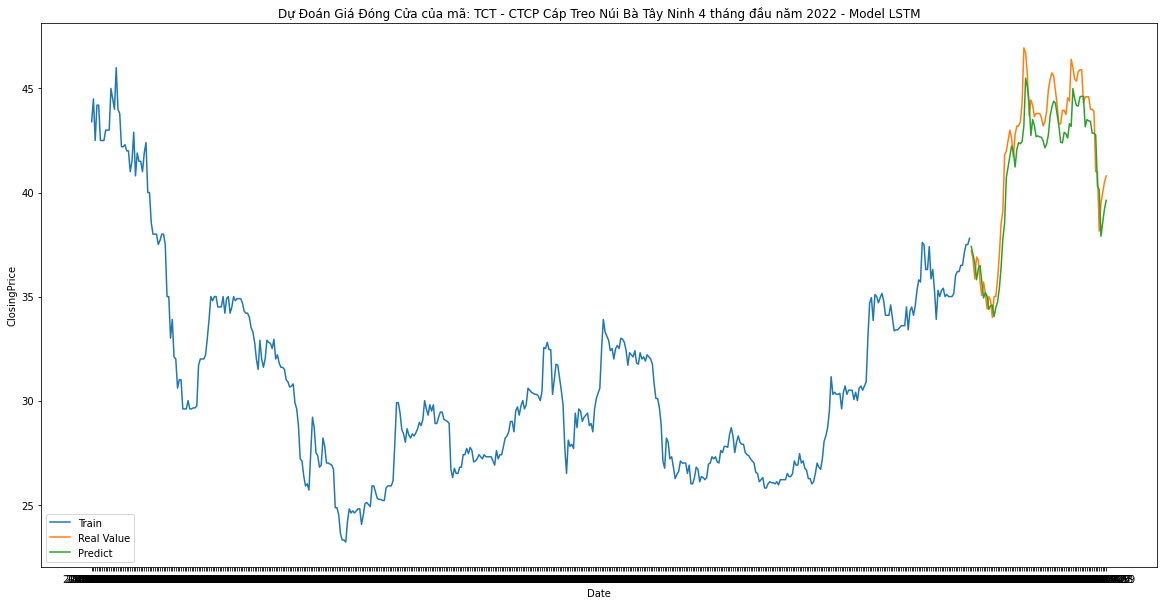

In [20]:
plt.figure(figsize=(20,10))
plt.title('Dự Đoán Giá Đóng Cửa của mã: '+ stock + " - " + company + " 4 tháng đầu năm 2022 - Model LSTM")
plt.xlabel('Date')
plt.ylabel('ClosingPrice')
plt.plot(df_train[['ClosingPrice']])
plt.plot(df_test[['ClosingPrice',"Predict"]])
plt.legend(['Train', 'Real Value', 'Predict'])
plt.show()

In [21]:
print('Train RMSE:', np.sqrt(mean_squared_error(actual_prices, predicted_prices.reshape(-1))))
print('Train MEA:',mean_absolute_error(actual_prices, predicted_prices.reshape(-1)))

Train RMSE: 1.3138571630322988
Train MEA: 1.1309778458032853
